In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\jtt\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jtt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\jtt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [34]:
data = pd.read_csv('C:/Users/jtt/Desktop/sarima_data.csv')

## Univariate Forecast

In [35]:
data_uni = data[['date', 'tv']]
data_uni.index = pd.to_datetime(data_uni['date'])
data_uni.drop(columns='date', inplace=True)

C:\Users\jtt\anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


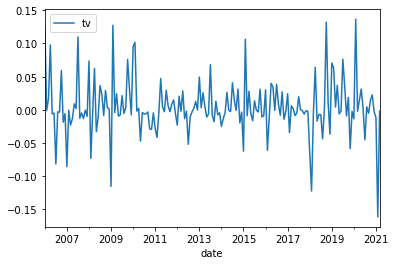

In [30]:
data_uni.plot()

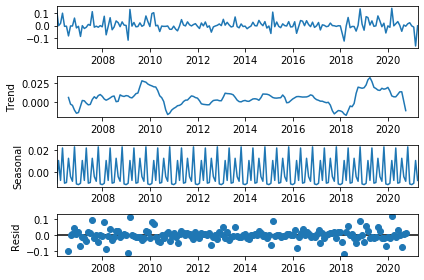

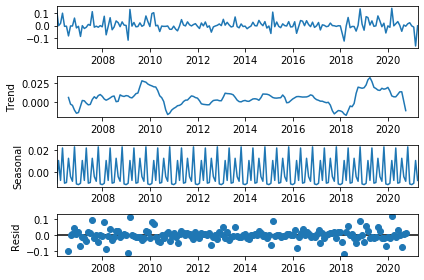

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data_uni, model="additive")
decompose_data.plot()

In [6]:
# testing stationarity 
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data_uni.tv, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.7677656331312024
2. P-Value :  0.003254879078266749
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 168
5. Critical Values :
	 1% :  -3.4698858990744115
	 5% :  -2.8789026251889647
	 10% :  -2.5760266680839004


In [36]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_uni,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\jtt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\jtt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


<Figure size 432x288 with 0 Axes>

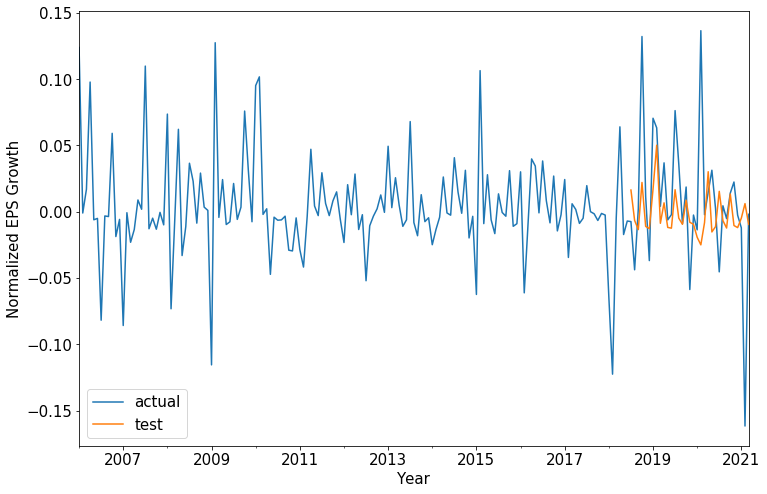

In [53]:
# in-sample prediction
plt.figure()
plt.rcParams.update({'font.size': 15}) # must set in top
data_uni['test']=results.predict(start=150,end=183,dynamic=True)
data_uni = data_uni.rename(columns={'tv': 'actual'})
data_uni[['actual','test']].plot(figsize=(12,8), xlabel='Year', ylabel='Normalized EPS Growth')

In [20]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
print(mean_absolute_error(data_uni['tv'].tail(9), data_uni['forecast'].tail(9)))
mean_absolute_percentage_error(data_uni['tv'].tail(9), data_uni['forecast'].tail(9))

0.02970768868976668


1.4920539877535814

In [38]:
results.forecast(9)

2021-04-30    0.034925
2021-05-31   -0.023608
2021-06-30   -0.009182
2021-07-31    0.047600
2021-08-31   -0.003220
2021-09-30   -0.005714
2021-10-31    0.029299
2021-11-30   -0.017628
2021-12-31   -0.009642
Freq: M, dtype: float64

In [39]:
data_uni.to_csv('C:/Users/jtt/Desktop/sarimax.csv')

In [40]:
pic = pd.read_csv('C:/Users/jtt/Desktop/sarimax.csv')

In [44]:
pic.index = pd.to_datetime(pic['date'])

In [47]:
pic = pic.drop(columns='date')

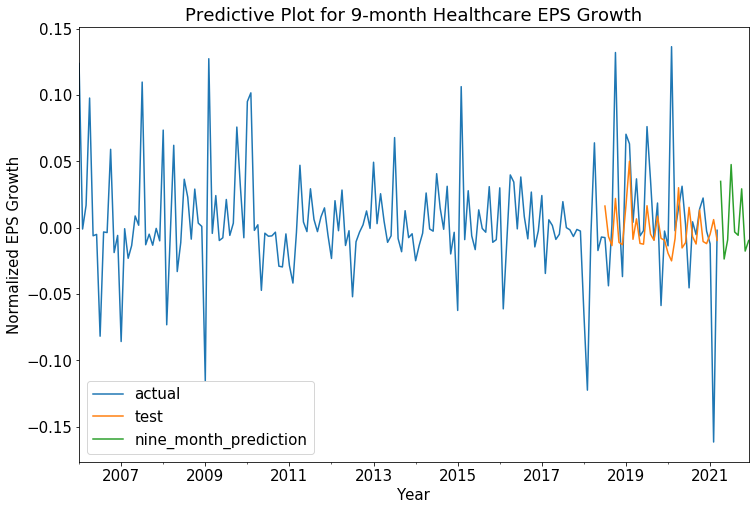

In [54]:
pic.plot(figsize=(12,8), xlabel='Year', ylabel='Normalized EPS Growth', title='Predictive Plot for 9-month Healthcare EPS Growth')